In [1]:
# import the libraries to read the files 
import pandas as pd
import os

In [2]:
# Take a look at the data
titanic_train = pd.read_csv('C:/Titanic/train.csv')
titanic_test = pd.read_csv('C:/Titanic/test.csv')
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# quick description of the dataset in particular the number of rows, number of non-null values.
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# checking the categorical attribute
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


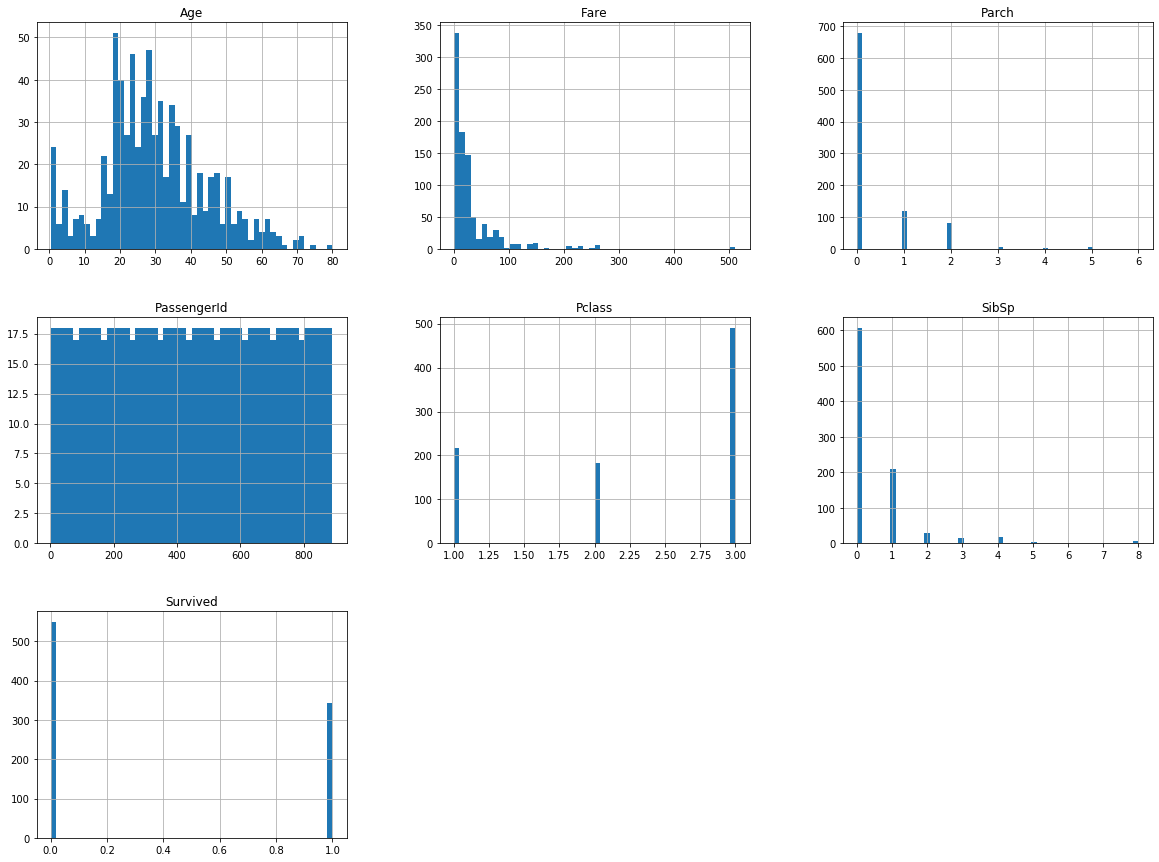

In [6]:
# a histogram for each numerical value
import matplotlib.pyplot as plt
%matplotlib inline
titanic_train.hist(bins = 50 , figsize = ( 20,15))
plt.show()

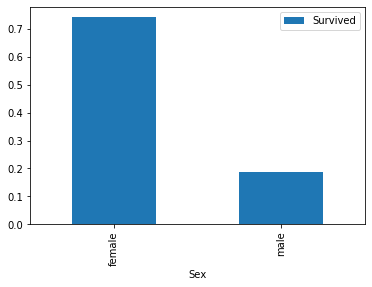

In [7]:
# pots the survival rate between the male and the female
sex_pivot = titanic_train.pivot_table(index ="Sex", values ="Survived")
sex_pivot.plot.bar()
plt.show()

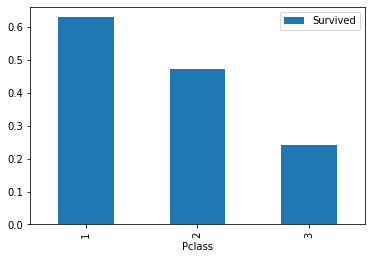

In [8]:
# a plot to determine which class was given a preference over the other class
pclass_pivot =titanic_train.pivot_table(index ="Pclass", values ="Survived")
pclass_pivot.plot.bar()
plt.show()

# Discover and visualize data to gain insights

In [9]:
survived = titanic_train[titanic_train["Survived"] == 1]
died = titanic_train[titanic_train["Survived"] == 0]


In [10]:
# checking out of the data which persons of which classes were given a priority over the other comparing the death raate and the survival rate 

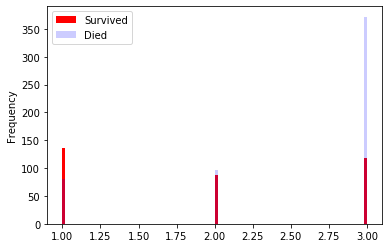

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
survived["Pclass"].plot.hist(alpha=1,color='red',bins=100)
died["Pclass"].plot.hist(alpha=0.2,color='blue',bins=100)
plt.legend(['Survived','Died'])
plt.show()
titanic_train['Pclass'].value_counts()

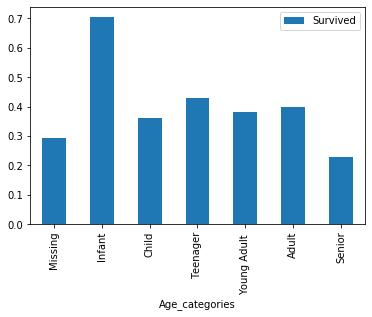

In [12]:
# Giving categorical values for age , which age group survived more than the other
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult ","Adult","Senior"]
titanic_train = process_age(titanic_train,cut_points,label_names)
titanic_test = process_age(titanic_test,cut_points,label_names)

pivot = titanic_train.pivot_table(index="Age_categories",values='Survived')
pivot.plot.bar()
plt.show()


In [82]:
# dropping values of no much use
titanic_train.drop('Cabin',axis = 1, inplace = True)

In [83]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,0,0,0,1,0,0


In [85]:
sex =pd.get_dummies(titanic_train['Sex'], drop_first = True)
embark = pd.get_dummies(titanic_train['Embarked'], drop_first = True)
titanic_train = pd.concat([titanic_train , sex,embark],axis =1)

In [88]:
titanic_train.drop(['Sex','Embarked','Ticket','Name','PassengerId'],axis = 1,inplace = True)


In [90]:
titanic_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Age_categories,Pclass_1,Pclass_2,Pclass_3,...,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,male,Q,S
0,0,3,22.0,1,0,7.2500,Young Adult,0,0,1,...,0,0,0,0,1,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,Adult,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,3,26.0,0,0,7.9250,Young Adult,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,Young Adult,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,Young Adult,0,0,1,...,0,0,0,0,1,0,0,1,0,1


In [94]:
# creating dummies values to remove any unwanted realationships
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

for column in ["Pclass","Age_categories"]:
    titanic_train = create_dummies(titanic_train,column)
    titanic_test = create_dummies(titanic_test,column)


# select a model and train the machine learning algorithm

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
lr = LogisticRegression()

In [98]:
columns = ['Pclass_2', 'Pclass_3', 'Sex_male']
lr.fit(titanic_train[columns], titanic_train['Survived'])


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
holddata = titanic_test
from sklearn.model_selection import train_test_split

In [100]:
X =titanic_train[columns]
y = titanic_train['Survived']

In [101]:
titanic_train_X, titanic_test_X, titanic_train_y, titanic_test_y = train_test_split(
    X, y, test_size=0.20,random_state=0)


In [104]:
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression()
logModel.fit(titanic_train_X ,titanic_train_y)


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [105]:
#from sklearn.metrics import classification_report

In [109]:
lr = LogisticRegression()
lr.fit(titanic_train_X, titanic_train_y)
predictions = lr.predict(titanic_test_X)


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [110]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(titanic_test_y, predictions)


In [111]:
# provides the accuracy score for the model
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(titanic_train_X,  titanic_train_y)
predictions = lr.predict(titanic_test_X)
accuracy = accuracy_score(titanic_test_y, predictions)
print(accuracy)


0.7877094972067039


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [117]:
# using cross validation for more acurate measure

from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

[0.74157303 0.76136364 0.76404494 0.7752809  0.7752809  0.78888889
 0.79775281 0.80898876 0.81111111 0.84269663]
0.7866981613891726


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [118]:
print(scores)
print(accuracy)



[0.74157303 0.76136364 0.76404494 0.7752809  0.7752809  0.78888889
 0.79775281 0.80898876 0.81111111 0.84269663]
0.7866981613891726


In [115]:
lr = LogisticRegression()
lr.fit(X,y)
holddata_predictions = lr.predict(holddata[columns])


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [116]:
from sklearn.metrics import classification_report
print(classification_report(titanic_test_y,predictions))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       110
           1       0.73      0.71      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179

